# Cleaning US Census Data

Exercise from CodeAcademy

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn't use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

In [65]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import glob

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [66]:
files = glob.glob("state*.csv")

us_census = []

for filename in files:
    data = pd.read_csv(filename)
    us_census.append(data)
    
us_census = pd.concat(us_census)

In [67]:
#check columns and data types
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


Looking at the head of the dataframe, we can check the data corresponding to the above datatypes and convert it to the appropiate datatype.

In [68]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


We can use regex to torn the Income into a format ready for conversion into numerical type.

In [69]:
#we remove the $
us_census.Income = us_census["Income"].replace("[\$,]","", regex = True)

#converted to number
us_census.Income = pd.to_numeric(us_census.Income)

We can split GenderPop column into Men and Women

In [70]:
us_census["str_split"] = us_census["GenderPop"].str.split("_")
us_census["Men"] = us_census.str_split.str.get(0)
us_census["Women"] = us_census.str_split.str.get(1)

#also we can remove the M and the F so we can convert the data to number for plotting
us_census.Men = us_census["Men"].replace("[M]","", regex = True)
us_census.Women = us_census["Women"].replace("[F]","", regex = True)

#converted to number
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,str_split,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,"[2341093M, 2489527F]",2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,"[384160M, 349215F]",384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,"[3299088M, 3342840F]",3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,"[1451913M, 1506295F]",1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,"[19087135M, 19334329F]",19087135,19334329.0


In [71]:
#filling NAN in women column: Women = TotalPop - Men
us_census = us_census.fillna(value={"Women":us_census.TotalPop - us_census.Men})

print(us_census)

   Unnamed: 0                 State  TotalPop             Hispanic  \
0           0               Alabama   4830620  3.7516156462584975%   
1           1                Alaska    733375   5.909580838323351%   
2           2               Arizona   6641928  29.565921052631502%   
3           3              Arkansas   2958208   6.215474452554738%   
4           4            California  38421464  37.291874687968054%   
5           5              Colorado   5278906   20.78438003220608%   
0           0              Colorado   5278906   20.78438003220608%   
1           1           Connecticut   3593222  15.604830917874388%   
2           2              Delaware    926454    8.82476635514019%   
3           3  District of Columbia    647484   9.165921787709499%   
4           4               Florida  19645772    21.3385426653884%   
5           5               Georgia  10006693   8.418242207460397%   
0           0               Georgia  10006693   8.418242207460397%   
1           1       

In [72]:
#we can also remove duplicates
new_census = us_census.drop_duplicates(["State"])
print(new_census)

   Unnamed: 0                 State  TotalPop             Hispanic  \
0           0               Alabama   4830620  3.7516156462584975%   
1           1                Alaska    733375   5.909580838323351%   
2           2               Arizona   6641928  29.565921052631502%   
3           3              Arkansas   2958208   6.215474452554738%   
4           4            California  38421464  37.291874687968054%   
5           5              Colorado   5278906   20.78438003220608%   
1           1           Connecticut   3593222  15.604830917874388%   
2           2              Delaware    926454    8.82476635514019%   
3           3  District of Columbia    647484   9.165921787709499%   
4           4               Florida  19645772    21.3385426653884%   
5           5               Georgia  10006693   8.418242207460397%   
1           1                Hawaii   1406299   9.186708860759486%   
2           2                 Idaho   1616547  11.505369127516781%   
3           3       

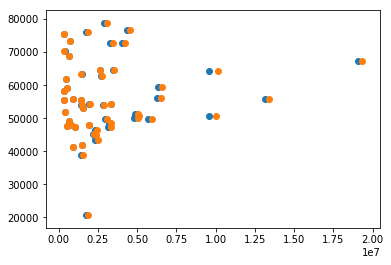

In [73]:
#scatterplot
pyplot.scatter(new_census.Men, new_census.Income)
pyplot.scatter(new_census.Women, new_census.Income)
pyplot.show()

Create histogram for each of the races

In [76]:
#first we need to convert the data to number
new_census.Hispanic = new_census["Hispanic"].replace("[\%,]","", regex = True)
new_census.White = new_census["White"].replace("[\%,]","", regex = True)
new_census.Black = new_census["Black"].replace("[\%,]","", regex = True)
new_census.Native = new_census["Native"].replace("[\%,]","", regex = True)
new_census.Asian = new_census["Asian"].replace("[\%,]","", regex = True)
new_census.Pacific = new_census["Pacific"].replace("[\%,]","", regex = True)

new_census.Hispanic = pd.to_numeric(new_census.Hispanic)
new_census.White = pd.to_numeric(new_census.White)
new_census.Black = pd.to_numeric(new_census.Black)
new_census.Native = pd.to_numeric(new_census.Native)
new_census.Asian = pd.to_numeric(new_census.Asian)
new_census.Pacific = pd.to_numeric(new_census.Pacific)

print(new_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
str_split      object
Men             int64
Women         float64
dtype: object


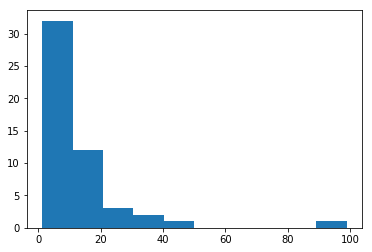

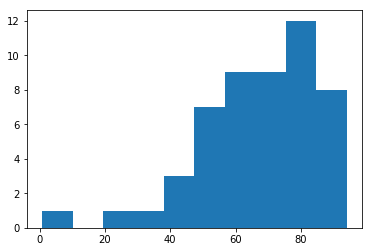

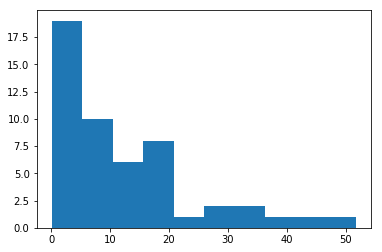

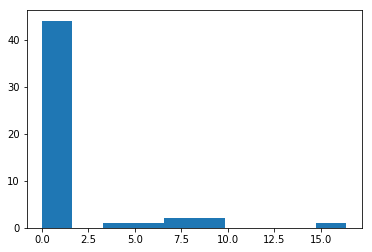

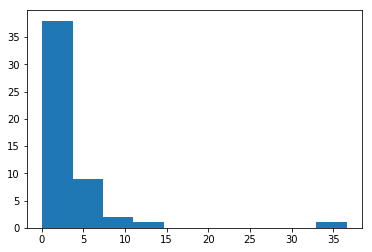

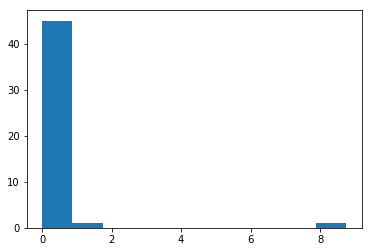

In [82]:
pyplot.hist(new_census.Hispanic)
pyplot.show()

pyplot.hist(new_census.White)
pyplot.show()

pyplot.hist(new_census.Black)
pyplot.show()

pyplot.hist(new_census.Native)
pyplot.show()

pyplot.hist(new_census.Asian)
pyplot.show()

pyplot.hist(new_census.Pacific)
pyplot.show()